<a href="https://colab.research.google.com/github/PatrykCiwinski/Text-Classification-with-CNN/blob/main/Text_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
!gdown 1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4/

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4/ 



In [213]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D,Conv1D,MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [214]:
df = pd.read_csv('bbc_text_cls.csv')

In [215]:
df['labels_digits']=df['labels'].astype('category').cat.codes

In [216]:
# number of classes( add one smoothing, to make model less over-confident )
K=df['labels_digits'].max()+1

In [217]:
df_train, df_test=train_test_split(df, test_size=0.3, random_state=123)

In [218]:
tokenizer= Tokenizer(2000)
tokenizer.fit_on_texts(df_train['text'])
# change texts to vectors
seq_train=tokenizer.texts_to_sequences(df_train['text'])
seq_test=tokenizer.texts_to_sequences(df_test['text'])

In [219]:
word2idx=tokenizer.word_index

In [220]:
V=len(word2idx)

In [221]:
#now to pad sequences
data_train=pad_sequences(seq_train)

In [222]:
T=data_train.shape[1]

In [223]:
data_test=pad_sequences(seq_test,maxlen=T)

In [224]:
embedding_dim = 50 #it's rather arbitral choose

In [225]:
i=Input(shape=(T,))
x=Embedding(V + 1, embedding_dim)(i)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(K)(x)

model = Model(i,x)


In [226]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])

In [227]:
history=model.fit(data_train,df_train['labels_digits'],epochs=50,validation_data=(data_test,df_test['labels_digits']))

Epoch 1/50
49/49 [==============================] - 8s 145ms/step - loss: 1.5995 - accuracy: 0.2511 - val_loss: 1.5940 - val_accuracy: 0.3174
Epoch 2/50
49/49 [==============================] - 6s 123ms/step - loss: 1.5122 - accuracy: 0.3693 - val_loss: 1.3300 - val_accuracy: 0.4940
Epoch 3/50
49/49 [==============================] - 4s 89ms/step - loss: 0.8192 - accuracy: 0.7103 - val_loss: 0.5547 - val_accuracy: 0.7919
Epoch 4/50
49/49 [==============================] - 5s 94ms/step - loss: 0.2764 - accuracy: 0.9358 - val_loss: 0.2915 - val_accuracy: 0.9057
Epoch 5/50
49/49 [==============================] - 3s 60ms/step - loss: 0.0686 - accuracy: 0.9910 - val_loss: 0.2170 - val_accuracy: 0.9192
Epoch 6/50
49/49 [==============================] - 3s 50ms/step - loss: 0.0189 - accuracy: 0.9994 - val_loss: 0.1893 - val_accuracy: 0.9341
Epoch 7/50
49/49 [==============================] - 2s 41ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1812 - val_accuracy: 0.9311
Epoch 8/50


In [228]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

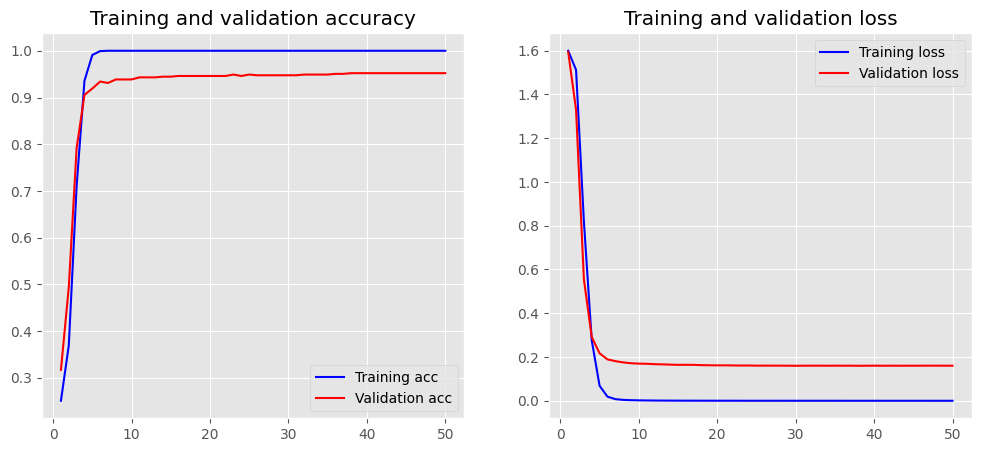

In [229]:
plot_history(history)

In [230]:
predictions=model.predict(data_test)

21/21 [==============================] - 0s 3ms/step


In [231]:
preds=np.argmax(predictions, axis=1)

In [232]:
from sklearn.metrics import classification_report

In [233]:
print(classification_report(df_test['labels_digits'],preds))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       140
           1       0.95      0.97      0.96       124
           2       0.96      0.95      0.96       136
           3       0.98      0.99      0.99       159
           4       0.89      0.92      0.90       109

    accuracy                           0.95       668
   macro avg       0.95      0.95      0.95       668
weighted avg       0.95      0.95      0.95       668



In [234]:
labels = {0:'business', 1:'entertainment', 2:'politics', 3:'sport',4:'tech'}

In [235]:
def text_to_predict(text):
  sequence=tokenizer.texts_to_sequences([text])
  text=pad_sequences(sequence,maxlen=T)
  predictions=model.predict(text)
  preds=np.argmax(predictions, axis=1)
  return labels[preds[0]]

In [236]:
text_to_predict("But many of the same media associations and outlets that championed the bill may now face a threat to their businesses, as Google fuels a significant portion of web traffic to Canadian news outlets.")

1/1 [==============================] - 0s 18ms/step


'politics'

In [237]:
# Creating model with transformers is better